In [2]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
n_D_input = 28*28
n_D_hidden = 256
n_D_output = 1

n_G_input = 100
n_G_hidden = 256
n_G_output = 28*28

In [4]:
weights = {
    'G1' : tf.Variable(tf.random_normal([n_G_input, n_G_hidden], stddev = 0.01)),
    'G2' : tf.Variable(tf.random_normal([n_G_hidden, n_G_output], stddev = 0.01)),
    'D1' : tf.Variable(tf.random_normal([n_D_input, n_D_hidden], stddev = 0.01)),
    'D2' : tf.Variable(tf.random_normal([n_D_hidden, n_D_output], stddev = 0.01))
}

biases = {
    'G1' : tf.Variable(tf.zeros([n_G_hidden])),
    'G2' : tf.Variable(tf.zeros([n_G_output])),
    'D1' : tf.Variable(tf.zeros([n_D_hidden])),
    'D2' : tf.Variable(tf.zeros([n_D_output]))
}

z = tf.placeholder(tf.float32, [None, n_G_input])
x = tf.placeholder(tf.float32, [None, n_D_input])

In [5]:
def generator(G_input, weights, biases):
    hidden = tf.nn.relu(tf.matmul(G_input, weights['G1']) + biases['G1'])
    output = tf.nn.sigmoid(tf.matmul(hidden, weights['G2']) + biases['G2'])
    return output

In [6]:
def discriminator(D_input, weights, biases):
    hidden = tf.nn.relu(tf.matmul(D_input, weights['D1']) + biases['D1'])
    output = tf.nn.sigmoid(tf.matmul(hidden, weights['D2']) + biases['D2'])
    return output

In [7]:
def make_noise(n_batch, n_G_input):
    return np.random.normal(size = (n_batch, n_G_input))

In [8]:
G_output = generator(z, weights, biases)

D_fake = discriminator(G_output, weights, biases)
D_real = discriminator(x, weights, biases)

In [9]:
D_loss = tf.reduce_mean(- tf.log(D_real) - tf.log(1 - D_fake))
G_loss = tf.reduce_mean(- tf.log(D_fake))

In [10]:
D_var_list = [weights['D1'], biases['D1'], weights['D2'], biases['D2']]
G_var_list = [weights['G1'], biases['G1'], weights['G2'], biases['G2']]

In [11]:
LR = 0.0002
D_optm = tf.train.AdamOptimizer(LR).minimize(D_loss, var_list = D_var_list)
G_optm = tf.train.AdamOptimizer(LR).minimize(G_loss, var_list = G_var_list)

In [ ]:
n_batch = 100
n_iter = 50000
n_prt = 5000

sess = tf.Session()
sess.run(tf.global_variables_initializer())

D_loss_record = []
G_loss_record = []

for epoch in range(n_iter):
    
    train_x, train_y = mnist.train.next_batch(n_batch)
    noise = make_noise(n_batch, n_G_input)

    # discriminator and generator are separately trained 
    sess.run(D_optm, feed_dict = {x: train_x, z: noise})
    sess.run(G_optm, feed_dict = {z: noise}) 
    
    if epoch % n_prt == 0:
        D_loss_val = sess.run(D_loss, feed_dict = {x: train_x, z: noise})
        G_loss_val = sess.run(G_loss, feed_dict = {z: noise})
        D_loss_record.append(D_loss_val)
        G_loss_record.append(G_loss_val)
    
        print('Epoch:', '%04d' % epoch, 'D_loss: {:.4}'.format(D_loss_val), 'G_loss: {:.4}'.format(G_loss_val))
        
        plt.figure(figsize = (10,5))
        plt.subplot(1,2,1)
        noise = make_noise(n_batch, n_G_input)
        G_img = sess.run(G_output, feed_dict = {z: noise})   
        plt.imshow(G_img[0,:].reshape(28,28), 'gray')
        plt.axis('off')
        plt.subplot(1,2,2)
        noise = make_noise(n_batch, n_G_input)
        G_img = sess.run(G_output, feed_dict = {z: noise})   
        plt.imshow(G_img[0,:].reshape(28,28), 'gray')
        plt.axis('off')
        plt.show()

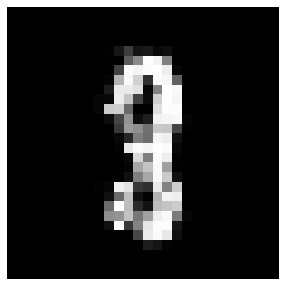

In [ ]:
noise = make_noise(n_batch, n_G_input)
G_img = sess.run(G_output, feed_dict = {z: noise})

plt.figure(figsize = (5,5))
plt.imshow(G_img[0,:].reshape(28,28), 'gray')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [ ]:
n_D_input = 28*28
n_D_hidden = 256
n_D_output = 1

n_G_input = 128
n_G_hidden = 256
n_G_output = 28*28

n_label = 10 # one-hot-encoding

In [ ]:
weights = {
    'G1' : tf.Variable(tf.random_normal([n_G_input + n_label, n_G_hidden], stddev = 0.01)),
    'G2' : tf.Variable(tf.random_normal([n_G_hidden, n_G_output], stddev = 0.01)),
    'D1' : tf.Variable(tf.random_normal([n_D_input + n_label, n_D_hidden], stddev = 0.01)),
    'D2' : tf.Variable(tf.random_normal([n_D_hidden, n_D_output], stddev = 0.01))
}

biases = {   
    'G1' : tf.Variable(tf.zeros([n_G_hidden])),
    'G2' : tf.Variable(tf.zeros([n_G_output])),
    'D1' : tf.Variable(tf.zeros([n_D_hidden])),
    'D2' : tf.Variable(tf.zeros([n_D_output]))
}

z = tf.placeholder(tf.float32, [None, n_G_input])
x = tf.placeholder(tf.float32, [None, n_D_input])
c = tf.placeholder(tf.float32, [None, n_label])

In [ ]:
def generator(G_input, label, weights, biases):
    hidden = tf.nn.relu(tf.matmul(tf.concat([G_input, label], 1), weights['G1']) + biases['G1'])    
    output = tf.nn.sigmoid(tf.matmul(hidden, weights['G2']) + biases['G2'])
    return output

In [ ]:
def discriminator(D_input, label, weights, biases):
    hidden = tf.nn.relu(tf.matmul(tf.concat([D_input, label], 1), weights['D1']) + biases['D1'])
    output = tf.nn.sigmoid(tf.matmul(hidden, weights['D2']) + biases['D2'])
    return output

In [ ]:
def make_noise(n_batch, n_G_input):
    return np.random.normal(size = (n_batch, n_G_input))

In [ ]:
G_output = generator(z, c, weights, biases)
D_fake = discriminator(G_output, c, weights, biases)
D_real = discriminator(x, c, weights, biases)

D_loss = tf.reduce_mean(-tf.log(D_real)-tf.log(1 - D_fake))
G_loss = tf.reduce_mean(-tf.log(D_fake))

D_var_list = [weights['D1'], biases['D1'], weights['D2'], biases['D2']]
G_var_list = [weights['G1'], biases['G1'], weights['G2'], biases['G2']]

LR = 0.0002
D_optm = tf.train.AdamOptimizer(LR).minimize(D_loss, var_list = D_var_list)
G_optm = tf.train.AdamOptimizer(LR).minimize(G_loss, var_list = G_var_list)

Epoch: 0000 D_loss: 1.363 G_loss: 0.7202


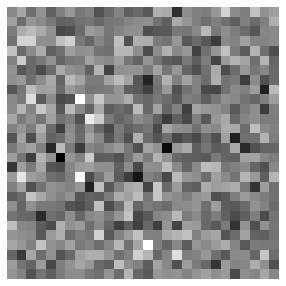

Epoch: 5000 D_loss: 0.2626 G_loss: 2.838


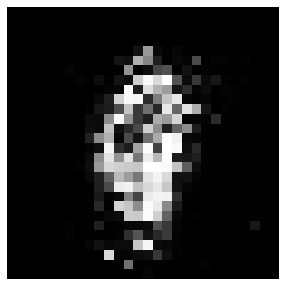

Epoch: 10000 D_loss: 0.4635 G_loss: 2.576


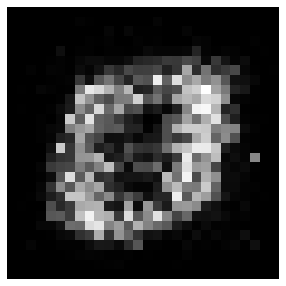

Epoch: 15000 D_loss: 0.5166 G_loss: 2.074


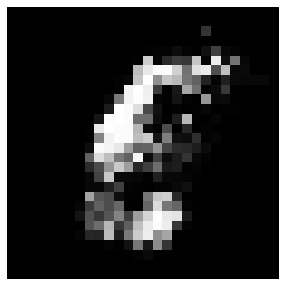

Epoch: 20000 D_loss: 0.5213 G_loss: 2.125


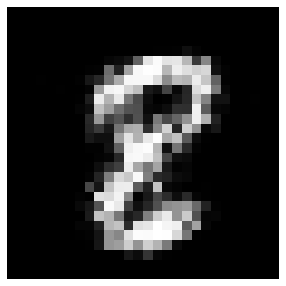

Epoch: 25000 D_loss: 0.7641 G_loss: 1.737


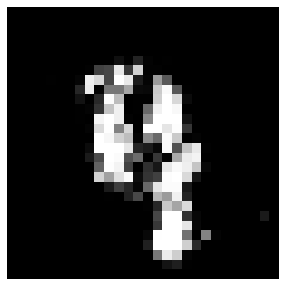

Epoch: 30000 D_loss: 0.7544 G_loss: 1.791


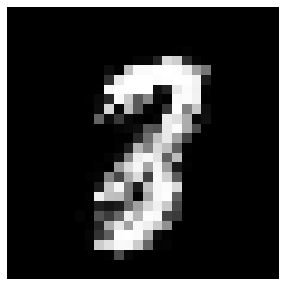

Epoch: 35000 D_loss: 0.753 G_loss: 1.76


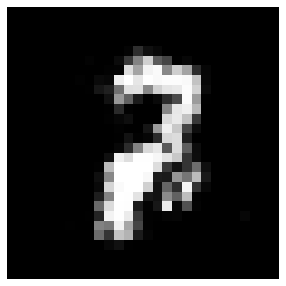

Epoch: 40000 D_loss: 0.9031 G_loss: 1.497


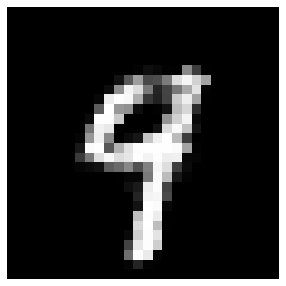

Epoch: 45000 D_loss: 0.8517 G_loss: 1.36


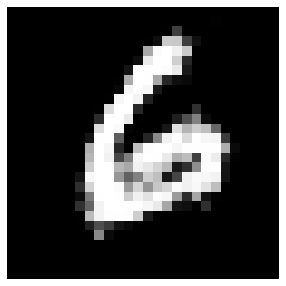

In [ ]:
n_batch = 100
n_iter = 50000
n_prt = 5000

sess = tf.Session()
sess.run(tf.global_variables_initializer())

D_loss_record = []
G_loss_record = []
for epoch in range(n_iter):
    train_x, train_y = mnist.train.next_batch(n_batch)
    noise = make_noise(n_batch, n_G_input)

    # discriminator and generator are separately trained 
    sess.run(D_optm, feed_dict = {x: train_x, z: noise, c: train_y})
    sess.run(G_optm, feed_dict = {z: noise, c: train_y})

    if epoch % n_prt == 0:
        D_loss_val = sess.run(D_loss, feed_dict = {x: train_x, z: noise, c: train_y})
        G_loss_val = sess.run(G_loss, feed_dict = {z: noise, c: train_y})
        D_loss_record.append(D_loss_val)
        G_loss_record.append(G_loss_val)
        
        print('Epoch:', '%04d' % epoch, 'D_loss: {:.4}'.format(D_loss_val), 'G_loss: {:.4}'.format(G_loss_val))

        plt.figure(figsize = (5,5))
        noise = make_noise(1, n_G_input)
        _, train_y = mnist.train.next_batch(1)
        G_img = sess.run(G_output, feed_dict = {z: noise, c: train_y})   
        plt.imshow(G_img.reshape(28,28), 'gray')
        plt.axis('off')
        plt.show()

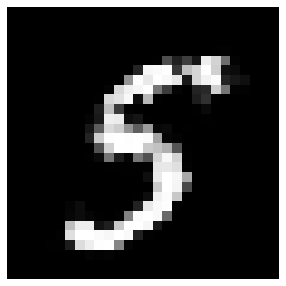

In [ ]:
noise = make_noise(1, n_G_input)
G_img = sess.run(G_output, feed_dict = {z: noise, c: [[0,0,0,0,0,1,0,0,0,0]]})

plt.figure(figsize = (5,5))
plt.imshow(G_img.reshape(28,28), 'gray')
plt.axis('off')
plt.show()